# TP 1 | Clustering de imágenes


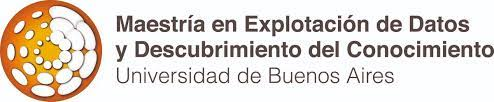

_Data mining en Ciencia y Tecnología_  
2do cuatrimestre 2023

## Importación de bibliotecas 

In [1]:
# bibliotecas (libraries) incorporadas (built-in) de Python
import os
from random import randint
# Para cargar solo una vez las bibliotecas detecta si es la primer ejecución del cuaderno
try:
    os.getegid()
    firstrun = False
except:
    firstrun = True

In [2]:
if (firstrun):
    try:
        from tensorflow.keras.utils  import load_img
    except:
        ! pip install tensorflow
        ! pip install tensorrt
        from tensorflow.keras.utils  import load_img

from tensorflow.keras.utils  import load_img
# for loading/processing the images
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils  import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array

2023-09-26 08:03:08.925129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 08:03:20.995687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


¿Por qué `tensorflow.keras` y `keras`?  
[Stack overflow | keras vs. tensorflow.python.keras - which one to use?](https://stackoverflow.com/questions/48893528/keras-vs-tensorflow-python-keras-which-one-to-use)
> tensorflow.python.keras is just a bundle of keras with a single backend inside tensorflow package. This allows you to start using keras by installing just pip install tensorflow.
> 
> keras package contains full keras library with three supported backends: tensorflow, theano and CNTK. If you even wish to switch between backends, you should choose keras package. This approach is also more flexible because it allows to install keras updates independently from tensorflow (which may not be easy to update, for example, because the next version may require a different version of CUDA driver) or vice versa. For this reason, I prefer to install keras as another package.

In [3]:
if (firstrun):
    try:
        from keras.models import Model
    except:
        ! pip install keras
        from keras.models import Model

from keras.models import Model
# Tensorflow model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

2023-09-26 08:03:35.009686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-26 08:03:36.222786: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Juan: Toma la capa -2 (output), la ante-última.
Cosas por hacer (probar)
- Probar con otra capa intermedia (no la terminal)
  - No es la última, más abstracta, sino tal vez una anterior

In [4]:
if (firstrun):
  try:
    # clustering and dimension reduction
    from sklearn.cluster import KMeans
  except:
    ! pip install scikit-learn
    from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
if (firstrun):
  try:
    import numpy as np
  except:
    ! pip install numpy
    import numpy as np

import numpy as np

In [6]:
if (firstrun):
  try:
    import matplotlib.pyplot as plt
  except:
    ! pip install matlplotlib
    import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

## Funciones provistas por los docentes

In [7]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    print(featsss.shape)
    featsss = featsss.reshape(-1,4096)
    return filenmss, featsss

In [8]:
def extract_features(file, model):
    # levanta imagen como array 224x224
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [9]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

## Carga local y coalescencia en única lista

### Directorio del conjuno de datos

In [10]:
# if (firstrun):
if('google.colab' in str(get_ipython() ) ):
    environment= 'google'
else:
    import os
    if (os.environ.get('PWD')=='/kaggle/working'):
        environment= 'kaggle'
    else:
        environment= 'local'
print(environment)

local


In [31]:
# Directorio del conjunto de datos
# Cambiar el local

# if (firstrun):
# path2 = 'datasets/Rice_Image_Dataset'
if( environment== 'local' ):
    datase_path = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/'
elif( ( environment== 'google' ) ):
    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = "/content/drive/MyDrive/maestría/cienciaTecnología/datasets/tp1_dmcyt2023/Rice_Image_Dataset"
elif( ( environment== 'kaggle' ) )  :
    dataset_path = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

## Generación del archivo de etiquetas

In [ ]:
# Tomado de https://www.kaggle.com/code/gustavo9898/pytorch-rice-image-classification
classes = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        classes.append(folder)
print(classes)

['Basmati', 'Ipsala', 'Arborio', 'Karacadag', 'Jasmine']


In [39]:
# Crear un archivo de texto para almacenar la información de todos los archivos
with open(dataset_path + '/rice_labels.txt', 'w') as dataset_file:
  # Encabezado
  dataset_file.write('file,label\n')

  # Recorrer cada directorio (clase)
  for clase in classes:
    # Obtener la ruta completa de la directorio de la clase
    directorio_clase = os.path.join(dataset_path, clase)

    # Verificar si es una directorio
    if os.path.isdir(directorio_clase):
      # Obtener la lista de archivos en la directorio de la clase
      archivos = os.listdir(directorio_clase)

      # Escribir los nombres de los archivos en el archivo de texto
      for archivo in archivos:
        # Escribir el nombre del archivo y la clase en el archivo dataset
        dataset_file.write(f'{archivo}, {clase}\n')


### Carga unificada

In [ ]:
# Arborio
image_path = DIR + path2
image_path
path = sorted(
  [
    os.path.join(image_path, file)
    for file in os.listdir(image_path )
    if file.endswith('.jpg')
  ]
)
print(len(path))
print(path[0])

15000
/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (1).jpg


In [ ]:
ca = 'Karacadag (3981).jpg'
ca.split(' ')[0]

'Karacadag'

## Carga de imágenes desde github

Tener el conjunto de datos (dataset) en un repositorio en GitHub ahorra tener que cambiar el sendero (path) hacia el mismo según en que plataforma se ejecute el cuaderno (notebook).

In [10]:
from urllib.request import urlopen
import urllib.parse

In [11]:
# cargar desde github imgágenes usando load_img
# path es un URL en github
path = "https://github.com/bettachini/tp1_dmcyt2023/blob/31015882beb672c9f86d515b41f0a73fa4788078/datasets/Rice_Image_Dataset/Arborio/"
image_url = path + "Arborio (1).jpg"
encoded_url = urllib.parse.quote(image_url, safe=":/")
eins = load_img(urlopen ( encoded_url ) )

TypeError: path should be path-like or io.BytesIO, not <class 'http.client.HTTPResponse'>

In [12]:
encoded_url

'https://github.com/bettachini/tp1_dmcyt2023/blob/31015882beb672c9f86d515b41f0a73fa4788078/datasets/Rice_Image_Dataset/Arborio/Arborio%20%281%29.jpg'

## Ideas

- Cargar los cinco paths por separado -> crear una única fuenta si es lo que necesita Keras
- Crear archivo de labels tomando los nombres de archivo 